In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time
import pandas as pd
import h5py
import os
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.svm import LinearSVC

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image, display_png
import csv
#import pydotplus as pdp

from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

/usr/local/pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


---
## 以下モデル構築

In [2]:
#読み込み時の型してい
dic_type={}
dic_type[1]="str"
dic_type[2]="str"
for i in range(3,11691):
    dic_type[2]="float64"

In [3]:
#でーた読み込み
#ft4=np.load("train.npy")
df4=np.load("test_after.npy")
ft4_23=np.load("train_2.npy")

In [4]:
#値の標準化
def zscore_wd(x, axis = None):
    xmean = x.mean(axis=axis, keepdims=True)
    xstd  = np.std(x, axis=axis, keepdims=True)
    zscore = (x-xmean)/xstd
    return zscore

In [5]:
def zscore(x, axis = None):
    xmean = x.mean(axis=axis)#, keepdims=True)
    xstd  = np.std(x, axis=axis)#, keepdims=True)
    zscore = (x-xmean)/xstd
    return zscore

In [6]:
ft4_23=zscore_wd(ft4_23,axis=1)

In [6]:
#ft4_23.shape

(11688, 53196)

In [7]:
#df4.shape

(11688, 30)

In [7]:
#del ft4

In [17]:
#merge_tsv2.iloc[2:ft2.shape[1],:]

,0,1,2,3,4,5,6,7,8,9,...,53186,53187,53188,53189,53190,53191,53192,53193,53194,53195
GTEX-1117F-0226-SM-5GZZ7,-0.0829867,0.0169259,-0.0827427,-0.0832577,-0.0834944,-0.0834944,-0.0834944,-0.082372,-0.0826174,-0.0834944,...,57.447,-0.0834944,-0.0834944,-0.0834944,13.4967,17.5323,-0.00822611,32.0886,-0.0791215,-0.0834944
GTEX-111CU-1826-SM-5GZYN,-0.0583051,-0.0223074,-0.0584748,-0.058687,-0.058687,-0.0583404,-0.058687,-0.0584493,-0.0573812,-0.055181,...,72.5356,-0.0563255,-0.0504018,-0.0563917,12.6692,11.937,-0.0350716,63.2016,-0.058687,-0.058687
GTEX-111FC-0226-SM-5N9B8,-0.0510231,-0.00299469,-0.0509493,-0.050999,-0.0510835,-0.0508642,-0.0510835,-0.0504823,-0.0508272,-0.0499753,...,77.7236,-0.0480977,-0.0493368,-0.0510835,9.48629,9.11594,-0.0376416,61.5313,-0.0510835,-0.043507
GTEX-111VG-2326-SM-5N9BK,-0.0509375,-0.0275787,-0.0510043,-0.0509108,-0.0510043,-0.0510043,-0.0510043,-0.0503398,-0.0504376,-0.0497794,...,53.2957,-0.047702,-0.0490736,-0.0510043,6.57936,6.93768,-0.0344957,37.2716,-0.0492783,-0.0493291
GTEX-111YS-2426-SM-5GZZQ,-0.0318787,-0.0181583,-0.0317736,-0.0318787,-0.0318787,-0.0318787,-0.0317029,-0.0318002,-0.0317672,-0.0310112,...,91.2699,-0.0295406,-0.0305111,-0.0307422,10.6893,9.33838,0.0242533,66.402,-0.0306562,-0.0283187
GTEX-1122O-2026-SM-5NQ91,-0.0368241,-0.0174737,-0.0369204,-0.0369204,-0.0369204,-0.036833,-0.0369204,-0.0367606,-0.0368069,-0.036037,...,87.9629,-0.0345383,-0.035528,-0.0369204,10.67,10.5932,0.0178383,71.8195,-0.0356756,-0.0345051
GTEX-1128S-2126-SM-5H12U,-0.0460108,-0.0199795,-0.0457364,-0.0458674,-0.0458035,-0.0460905,-0.0460905,-0.0454297,-0.0458276,-0.0431659,...,92.5339,-0.0460905,-0.0460905,-0.0460905,7.97371,6.91165,-0.0283594,63.9102,-0.0419718,-0.0440912
GTEX-113IC-0226-SM-5HL5C,-0.0642011,-0.0153542,-0.0637864,-0.0640654,-0.0643367,-0.0645406,-0.0645406,-0.0636961,-0.0643272,-0.0645406,...,69.3622,-0.0617432,-0.0645406,-0.0645406,29.0446,49.811,0.12009,53.4383,-0.0382208,-0.0503469
GTEX-117YX-2226-SM-5EGJJ,-0.0383208,-0.0171393,-0.0384666,-0.0384363,-0.0385832,-0.0385832,-0.0384857,-0.0384526,-0.038311,-0.0385832,...,92.4028,-0.0230158,-0.0385832,-0.0385832,8.00856,7.01541,-0.0307984,61.6107,-0.0385832,-0.0346344
GTEX-11DXW-0326-SM-5H11W,-0.0387638,-0.0189231,-0.0386876,-0.0388262,-0.0388262,-0.038713,-0.0387103,-0.0381018,-0.0382968,-0.0376819,...,84.4091,-0.0388262,-0.0388262,-0.0388262,10.348,10.5641,-0.0156958,75.3533,-0.0388262,-0.037261


In [18]:
#merge_tsv2.iloc[2:ft2.shape[1],:].shape

(11688, 53196)

In [10]:
#ft4_2=merge_tsv2.iloc[2:ft2.shape[1],:].values.astype(np.float64)

In [22]:
#df4.shape

(11688, 30)

In [7]:
#くれんデータ分割
X_train, X_test, y_train, y_test =train_test_split(ft4_23,df4)
#print(ft3.shape,X_train.shape,y_train.shape)
#print(ft3.shape,X_train.shape,y_train.shape)

In [8]:
#モデル作成
from keras.models import Sequential,optimizers
from keras.layers import Dense,Activation,Dropout,GlobalMaxPooling1D
opt=optimizers.SGD(lr=0.01)
#opt=optimizers.rmsprop(lr=0.001)
X_train,X_valid=np.split(X_train,[4000])
y_train,y_valid=np.split(y_train,[4000])
model1=Sequential()
model1.add(Dropout(0.05,input_shape=(53196,)))#56202
model1.add(Dense(2048))
#model1.add(Dense(2048,activation='relu'))
#model1.add(Dense(2048,activation='relu'))
model1.add(Dense(2048,activation='relu'))
#model1.add(GlobalMaxPooling1D())
#model1.add(Dense(2048,activation='relu'))
#model1.add(Dense(1024,activation='relu'))
#model1.add(Dense(1024,activation='relu'))
model1.add(Dense(1024,activation='relu'))
model1.add(Dense(512,activation='relu'))
#model1.add(Dense(512,activation='relu'))
model1.add(Dense(512,activation='relu'))
model1.add(Dense(256,activation='relu'))
model1.add(Dense(256,activation='relu'))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(30))
model1.add(Activation("softmax"))
model1.compile(loss="categorical_crossentropy",optimizer=opt,metrics=["accuracy"])
fit=model1.fit(X_train,y_train,epochs=50,batch_size=256,verbose=2,validation_data=(X_valid,y_valid),callbacks=[])
score=model1.evaluate(X_test,y_test,batch_size=64)

Using TensorFlow backend.
/usr/local/pyenv/versions/3.6.5/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Train on 4000 samples, validate on 4766 samples
Epoch 1/50
 - 5s - loss: 2.9808 - acc: 0.2543 - val_loss: 2.6180 - val_acc: 0.3626
Epoch 2/50
 - 3s - loss: 2.3598 - acc: 0.4017 - val_loss: 2.8822 - val_acc: 0.2241
Epoch 3/50
 - 3s - loss: 2.0552 - acc: 0.4805 - val_loss: 1.6467 - val_acc: 0.5627
Epoch 4/50
 - 3s - loss: 1.6187 - acc: 0.5928 - val_loss: 1.4731 - val_acc: 0.6353
Epoch 5/50
 - 3s - loss: 1.3404 - acc: 0.6495 - val_loss: 1.2615 - val_acc: 0.6578
Epoch 6/50
 - 3s - loss: 1.1621 - acc: 0.6920 - val_loss: 1.5662 - val_acc: 0.5669
Epoch 7/50
 - 3s - loss: 1.0546 - acc: 0.7172 - val_loss: 0.9214 - val_acc: 0.7440
Epoch 8/50
 - 3s - loss: 0.9217 - acc: 0.7515 - val_loss: 0.6973 - val_acc: 0.8258
Epoch 9/50
 - 3s - loss: 0.7616 - acc: 0.7957 - val_loss: 0.6400 - val_acc: 0.8269
Epoch 10/50
 - 3s - loss: 0.6967 - acc: 0.7978 - val_loss: 0.6220 - val_acc: 0.8389
Epoch 11/50
 - 3s - loss: 0.7209 - acc: 0.7927 - val_loss: 0.7923 - val_acc: 0.7914
Epoch 12/50
 - 3s - loss: 0.5643 - ac

In [9]:
pred_y=model1.predict(X_test)

In [10]:
np.sum(np.argmax(pred_y,axis=1)==np.argmax(y_test,axis=1))/pred_y.shape[0]

0.945927446954141

In [11]:
y_test[10]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
del ft4_23

In [14]:
del X_train

---
## 以下answer（訓練データのy）をデータに合わせてラベル化したのちonehotベクトル化

In [12]:
#以下疾患データにAPPLY
ft2=pd.read_table("GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.gct/GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.gct", sep="\t", header=2,dtype=dic_type)

In [15]:
df2=pd.read_csv("answer.csv", delimiter="\t")

In [17]:
ft1=ft2.transpose()

In [18]:
merge=pd.merge(ft1, df2,right_on="SAMPID",left_index=True)
print(merge.head())

           0      1        2        3  4        5        6        7        8  \
3     0.1082   21.4   0.1602  0.05045  0        0        0   0.2392   0.1869   
35    0.1158  11.03  0.06433        0  0   0.1051        0  0.07206   0.3959   
43   0.02104  16.75  0.04674  0.02945  0  0.07637        0   0.2094  0.08927   
70   0.02329  8.172        0   0.0326  0        0        0   0.2318   0.1977   
101        0  7.658  0.05864        0  0        0  0.09811  0.04379  0.06222   

         9       ...         56194   56195 56196 56197  56198  56199   56200  \
3    9.467       ...             0       0  2894  3754  16.04   6856  0.9319   
35   8.643       ...         2.512  0.6959  3859  3637   7.16  19180       0   
43   2.386       ...        0.6084       0  3322  3193  4.682  21450       0   
70   31.61       ...        0.6735       0  2313  2438  5.759  13020  0.6021   
101  5.961       ...        0.7633  0.6343  5984  5230  31.33  37080  0.6823   

      56201                    SAMPID 

In [24]:
df3=merge.iloc[:,56202:]
label = LabelEncoder()
#ラベルを覚えさせる
label = label.fit(df3['SMTS'])
#ラベルを整数に変換
df3['tissue'] = label.transform(df3['SMTS'])
df3.head()
df4=np.identity(30)[df3.iloc[:,2].values]

In [25]:
df3

,SAMPID,SMTS,tissue
3,GTEX-1117F-0226-SM-5GZZ7,Adipose Tissue,0
35,GTEX-111CU-1826-SM-5GZYN,Adipose Tissue,0
43,GTEX-111FC-0226-SM-5N9B8,Adipose Tissue,0
70,GTEX-111VG-2326-SM-5N9BK,Adipose Tissue,0
101,GTEX-111YS-2426-SM-5GZZQ,Adipose Tissue,0
126,GTEX-1122O-2026-SM-5NQ91,Adipose Tissue,0
140,GTEX-1128S-2126-SM-5H12U,Adipose Tissue,0
152,GTEX-113IC-0226-SM-5HL5C,Adipose Tissue,0
228,GTEX-117YX-2226-SM-5EGJJ,Adipose Tissue,0
269,GTEX-11DXW-0326-SM-5H11W,Adipose Tissue,0


In [26]:
np.save("test_after.npy",df4)

---
## 以下モデル適応

In [9]:
#以下疾患データにAPPLY
ft2=pd.read_table("GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.gct/GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_tpm.gct", sep="\t", header=2,dtype=dic_type)

In [10]:
ft2.iloc[:,2:]=zscore(ft2.iloc[:,2:])

In [11]:
#DATAの.以下を削除（VERSION情報を削除）
ft2.iloc[:,0]=ft2.iloc[:,0].str[:15]

In [12]:
ft2

,Name,Description,GTEX-1117F-0226-SM-5GZZ7,GTEX-111CU-1826-SM-5GZYN,GTEX-111FC-0226-SM-5N9B8,GTEX-111VG-2326-SM-5N9BK,GTEX-111YS-2426-SM-5GZZQ,GTEX-1122O-2026-SM-5NQ91,GTEX-1128S-2126-SM-5H12U,GTEX-113IC-0226-SM-5HL5C,...,GTEX-ZVE2-0006-SM-51MRW,GTEX-ZVP2-0005-SM-51MRK,GTEX-ZVT2-0005-SM-57WBW,GTEX-ZVT3-0006-SM-51MT9,GTEX-ZVT4-0006-SM-57WB8,GTEX-ZVTK-0006-SM-57WBK,GTEX-ZVZP-0006-SM-51MSW,GTEX-ZVZQ-0006-SM-51MR8,GTEX-ZXES-0005-SM-57WCB,GTEX-ZXG5-0005-SM-57WCN
0,ENSG00000223972,DDX11L1,-0.082987,-0.058305,-0.051023,-0.050938,-0.031879,-0.036824,-0.046011,-0.064201,...,-0.007404,-0.023319,-0.012711,-0.010912,-0.019300,-0.013588,-0.032820,-0.012237,-0.016445,-0.026980
1,ENSG00000227232,WASH7P,0.016926,-0.022307,-0.002995,-0.027579,-0.018158,-0.017474,-0.019980,-0.015354,...,-0.005800,-0.006162,-0.008807,-0.007362,-0.010537,-0.007907,-0.010035,-0.003707,-0.009147,-0.007695
2,ENSG00000243485,MIR1302-11,-0.082743,-0.058475,-0.050949,-0.051004,-0.031774,-0.036920,-0.045736,-0.063786,...,-0.007408,-0.023464,-0.012786,-0.010847,-0.020043,-0.014089,-0.032945,-0.012531,-0.016621,-0.027120
3,ENSG00000237613,FAM138A,-0.083258,-0.058687,-0.050999,-0.050911,-0.031879,-0.036920,-0.045867,-0.064065,...,-0.007442,-0.023422,-0.012733,-0.010892,-0.020043,-0.014076,-0.033045,-0.012493,-0.016637,-0.027150
4,ENSG00000268020,OR4G4P,-0.083494,-0.058687,-0.051084,-0.051004,-0.031879,-0.036920,-0.045803,-0.064337,...,-0.007442,-0.023512,-0.012786,-0.010912,-0.020043,-0.014140,-0.032883,-0.012531,-0.016665,-0.027136
5,ENSG00000240361,OR4G11P,-0.083494,-0.058340,-0.050864,-0.051004,-0.031879,-0.036833,-0.046090,-0.064541,...,-0.007415,-0.023434,-0.012752,-0.010912,-0.020043,-0.014140,-0.032963,-0.012531,-0.016629,-0.027202
6,ENSG00000186092,OR4F5,-0.083494,-0.058687,-0.051084,-0.051004,-0.031703,-0.036920,-0.046090,-0.064541,...,-0.007442,-0.023432,-0.012751,-0.010912,-0.020043,-0.014140,-0.032961,-0.012531,-0.016591,-0.027202
7,ENSG00000238009,RP11-34P13.7,-0.082372,-0.058449,-0.050482,-0.050340,-0.031800,-0.036761,-0.045430,-0.063696,...,-0.007404,-0.022480,-0.012475,-0.010864,-0.019518,-0.014026,-0.032485,-0.012486,-0.016582,-0.026988
8,ENSG00000233750,CICP27,-0.082617,-0.057381,-0.050827,-0.050438,-0.031767,-0.036807,-0.045828,-0.064327,...,-0.007342,-0.021741,-0.011556,-0.010864,-0.018940,-0.013815,-0.021154,-0.012399,-0.015030,-0.024695
9,ENSG00000237683,AL627309.1,-0.039070,-0.030180,-0.044233,0.039608,-0.021199,-0.023701,-0.005033,-0.058690,...,0.028562,0.274333,0.191441,0.015378,0.429182,0.036084,0.455581,0.023519,0.183863,0.432192


In [12]:
import collections
import matplotlib.pyplot as plt
tsv=pd.read_csv("patient_data/TCGA-LIHC.htseq_fpkm.tsv", delimiter="\t")
#change FPKM to TPM
tsv.iloc[:,1:]=1000000*tsv.iloc[:,1:]/tsv.iloc[:,1:].sum()
tsv.iloc[:,1:]=zscore(tsv.iloc[:,1:])
tsv.iloc[:,0]=tsv.iloc[:,0].str[:15]

merge_tsv=pd.merge(ft2,tsv, right_on='Ensembl_ID', left_on='Name', how='inner')
#print(merge_tsv.shape)
#（先に正規化し）欠損値補完e
merge_tsv2=merge_tsv.transpose()
#print(merge_tsv2.isnull().any().sum())
#del merge_tsv
#merged_tsv3=merge_tsv2.fillna(merge_tsv2.iloc[2:ft2.shape[1],:].mean())#,inplace=True)#欠損値補完

In [13]:
tsv

,Ensembl_ID,TCGA-CS-4938-01B,TCGA-CS-4941-01A,TCGA-CS-4942-01A,TCGA-CS-4943-01A,TCGA-CS-4944-01A,TCGA-CS-5390-01A,TCGA-CS-5393-01A,TCGA-CS-5394-01A,TCGA-CS-5395-01A,...,TCGA-VW-A8FI-01A,TCGA-W9-A837-01A,TCGA-WH-A86K-01A,TCGA-WY-A858-01A,TCGA-WY-A859-01A,TCGA-WY-A85A-01A,TCGA-WY-A85B-01A,TCGA-WY-A85C-01A,TCGA-WY-A85D-01A,TCGA-WY-A85E-01A
0,ENSG00000242268,-0.507386,-0.334787,-0.481521,-0.443617,-0.487306,-0.409521,-0.487331,0.271969,-0.213720,...,0.860628,-0.313820,-0.528093,-0.088363,-0.258189,-0.362065,-0.289131,0.504743,0.114974,-0.364278
1,ENSG00000270112,-0.483280,-0.438735,-0.494435,-0.471763,-0.476679,-0.485142,-0.495855,-0.519130,-0.404619,...,-0.354582,-0.355898,-0.489286,-0.526031,-0.178921,-0.513262,-0.542513,-0.533249,-0.527207,-0.464698
2,ENSG00000167578,0.985665,1.169052,1.264223,0.771857,1.869408,0.587111,0.922552,0.487057,1.107868,...,2.115589,0.925958,1.547420,1.606173,1.733057,1.310709,1.094432,1.124249,1.668091,1.219475
3,ENSG00000273842,-0.507386,-0.550715,-0.524311,-0.528533,-0.487306,-0.537285,-0.539303,-0.522383,-0.530391,...,-0.555661,-0.315317,-0.528093,-0.540613,-0.558295,-0.550922,-0.546571,-0.561178,-0.540313,-0.566261
4,ENSG00000078237,0.891783,1.354867,1.098464,1.508268,1.064779,0.785502,0.915384,1.557486,1.362550,...,1.171693,0.766398,0.637306,0.859123,0.847539,0.817265,1.164335,0.403975,0.856888,0.811548
5,ENSG00000146083,1.437426,1.826014,1.803031,2.007968,1.426501,2.119590,2.181204,2.027458,1.456486,...,1.785470,2.057268,1.745739,1.798695,2.235228,2.096347,1.865213,2.299905,1.551540,2.294529
6,ENSG00000225275,-0.507386,-0.550715,-0.524311,-0.528533,-0.487306,-0.537285,-0.539303,-0.522383,-0.530391,...,-0.555661,-0.553749,-0.528093,-0.540613,-0.558295,-0.550922,-0.546571,-0.561178,-0.463496,-0.566261
7,ENSG00000158486,-0.506195,-0.548640,-0.524311,-0.525383,-0.483659,-0.532989,-0.535515,-0.519045,-0.529219,...,-0.550493,-0.549094,-0.526404,-0.538940,-0.547968,-0.547647,-0.543793,-0.555144,-0.540313,-0.563907
8,ENSG00000198242,4.141060,3.645249,4.202020,4.328965,4.771179,4.681481,4.357062,3.815091,3.921657,...,4.044153,4.082979,4.437379,4.384732,3.920320,4.397792,4.335013,4.745903,3.888878,4.421239
9,ENSG00000259883,-0.507386,-0.492000,-0.524311,-0.488535,-0.487306,-0.437849,-0.468181,-0.480020,-0.507872,...,-0.522687,-0.509459,-0.528093,-0.162360,-0.538353,-0.489171,-0.350841,-0.561178,-0.540313,-0.521522


In [14]:
merge_tsv2.shape

(12220, 53196)

In [15]:
merge_tsv2

,0,1,2,3,4,5,6,7,8,9,...,53186,53187,53188,53189,53190,53191,53192,53193,53194,53195
Name,ENSG00000223972,ENSG00000227232,ENSG00000243485,ENSG00000237613,ENSG00000268020,ENSG00000240361,ENSG00000186092,ENSG00000238009,ENSG00000233750,ENSG00000268903,...,ENSG00000198886,ENSG00000210176,ENSG00000210184,ENSG00000210191,ENSG00000198786,ENSG00000198695,ENSG00000210194,ENSG00000198727,ENSG00000210195,ENSG00000210196
Description,DDX11L1,WASH7P,MIR1302-11,FAM138A,OR4G4P,OR4G11P,OR4F5,RP11-34P13.7,CICP27,RP11-34P13.15,...,MT-ND4,MT-TH,MT-TS2,MT-TL2,MT-ND5,MT-ND6,MT-TE,MT-CYB,MT-TT,MT-TP
GTEX-1117F-0226-SM-5GZZ7,-0.0829867,0.0169259,-0.0827427,-0.0832577,-0.0834944,-0.0834944,-0.0834944,-0.082372,-0.0826174,-0.0834944,...,57.447,-0.0834944,-0.0834944,-0.0834944,13.4967,17.5323,-0.00822611,32.0886,-0.0791215,-0.0834944
GTEX-111CU-1826-SM-5GZYN,-0.0583051,-0.0223074,-0.0584748,-0.058687,-0.058687,-0.0583404,-0.058687,-0.0584493,-0.0573812,-0.055181,...,72.5356,-0.0563255,-0.0504018,-0.0563917,12.6692,11.937,-0.0350716,63.2016,-0.058687,-0.058687
GTEX-111FC-0226-SM-5N9B8,-0.0510231,-0.00299469,-0.0509493,-0.050999,-0.0510835,-0.0508642,-0.0510835,-0.0504823,-0.0508272,-0.0499753,...,77.7236,-0.0480977,-0.0493368,-0.0510835,9.48629,9.11594,-0.0376416,61.5313,-0.0510835,-0.043507
GTEX-111VG-2326-SM-5N9BK,-0.0509375,-0.0275787,-0.0510043,-0.0509108,-0.0510043,-0.0510043,-0.0510043,-0.0503398,-0.0504376,-0.0497794,...,53.2957,-0.047702,-0.0490736,-0.0510043,6.57936,6.93768,-0.0344957,37.2716,-0.0492783,-0.0493291
GTEX-111YS-2426-SM-5GZZQ,-0.0318787,-0.0181583,-0.0317736,-0.0318787,-0.0318787,-0.0318787,-0.0317029,-0.0318002,-0.0317672,-0.0310112,...,91.2699,-0.0295406,-0.0305111,-0.0307422,10.6893,9.33838,0.0242533,66.402,-0.0306562,-0.0283187
GTEX-1122O-2026-SM-5NQ91,-0.0368241,-0.0174737,-0.0369204,-0.0369204,-0.0369204,-0.036833,-0.0369204,-0.0367606,-0.0368069,-0.036037,...,87.9629,-0.0345383,-0.035528,-0.0369204,10.67,10.5932,0.0178383,71.8195,-0.0356756,-0.0345051
GTEX-1128S-2126-SM-5H12U,-0.0460108,-0.0199795,-0.0457364,-0.0458674,-0.0458035,-0.0460905,-0.0460905,-0.0454297,-0.0458276,-0.0431659,...,92.5339,-0.0460905,-0.0460905,-0.0460905,7.97371,6.91165,-0.0283594,63.9102,-0.0419718,-0.0440912
GTEX-113IC-0226-SM-5HL5C,-0.0642011,-0.0153542,-0.0637864,-0.0640654,-0.0643367,-0.0645406,-0.0645406,-0.0636961,-0.0643272,-0.0645406,...,69.3622,-0.0617432,-0.0645406,-0.0645406,29.0446,49.811,0.12009,53.4383,-0.0382208,-0.0503469


In [16]:
np.save("tsv_writed.npy",merge_tsv2.iloc[ft2.shape[1]+1:,:].values)
#np.save("train_2.npy",merge_tsv2.iloc[2:ft2.shape[1],:].values.astype(np.float64))

In [14]:
merge_tsv2.iloc[ft2.shape[1]+1:,:]

,0,1,2,3,4,5,6,7,8,9,...,53186,53187,53188,53189,53190,53191,53192,53193,53194,53195
TCGA-CS-4938-01B,-0.507386,-0.170819,-0.507386,-0.507386,-0.507386,-0.507386,-0.507386,-0.507386,-0.507386,-0.374402,...,9.89184,-0.507386,-0.241428,-0.507386,8.74459,9.06313,-0.0861539,8.87504,0.477847,6.5026
TCGA-CS-4941-01A,-0.5418,-0.187489,-0.550715,-0.550715,-0.550715,-0.550715,-0.550715,-0.550715,-0.546648,-0.176571,...,7.83347,-0.178221,-0.550715,-0.352619,7.11236,7.43123,0.0934174,7.28906,0.665277,5.24909
TCGA-CS-4942-01A,-0.524311,-0.355392,-0.524311,-0.524311,-0.524311,-0.524311,-0.524311,-0.520156,-0.524311,-0.20878,...,8.19717,0.120272,-0.290401,-0.0182233,7.58423,8.04691,-0.00672836,7.81195,0.620454,5.67017
TCGA-CS-4943-01A,-0.519506,-0.178502,-0.528533,-0.528533,-0.528533,-0.528533,-0.528533,-0.528533,-0.528533,-0.4679,...,7.70805,-0.152918,-0.292195,-0.328414,6.92178,7.27404,0.119407,7.07029,0.538058,5.66262
TCGA-CS-4944-01A,-0.487306,-0.16337,-0.487306,-0.487306,-0.487306,-0.487306,-0.487306,-0.487306,-0.487306,-0.440097,...,9.06728,-0.251032,0.701494,-0.257029,7.64903,8.63441,0.250037,8.50231,0.622068,6.8066
TCGA-CS-5390-01A,-0.528047,-0.045166,-0.537285,-0.537285,-0.537285,-0.537285,-0.537285,-0.537285,-0.528872,-0.30883,...,8.74017,-0.00369546,-0.0997102,-0.537285,7.67309,7.96567,-0.327045,7.68716,0.55551,6.37245
TCGA-CS-5393-01A,-0.539303,0.178755,-0.539303,-0.539303,-0.539303,-0.539303,-0.539303,-0.539303,-0.539303,-0.200409,...,9.18805,-0.296053,-0.0402035,-0.109389,8.18363,8.23977,0.0660516,8.7784,2.41328,6.67986
TCGA-CS-5394-01A,-0.522383,-0.0623604,-0.490233,-0.522383,-0.522383,-0.522383,-0.522383,-0.509047,-0.513673,-0.458182,...,9.06531,-0.522383,-0.522383,-0.310868,7.93564,7.9937,0.0263634,8.02691,1.30615,6.90439
TCGA-CS-5395-01A,-0.530391,0.00449222,-0.530391,-0.530391,-0.530391,-0.530391,-0.530391,-0.530391,-0.530391,-0.420256,...,8.38503,-0.303076,-0.530391,-0.530391,7.79082,7.98786,-0.303076,7.75257,0.622708,5.3248
TCGA-CS-5396-01A,-0.512772,-0.101678,-0.512772,-0.512772,-0.512772,-0.512772,-0.512772,-0.512772,-0.509203,-0.459986,...,7.9286,-0.0439773,0.0180722,0.0620065,6.82735,7.06585,-0.0439773,7.1703,0.624022,4.90867


[[2.97173439e-03 2.57325713e-02 3.36746275e-02 1.01445206e-02
  5.32863545e-04 5.39468834e-03 1.39244525e-02 3.05412523e-02
  1.42940576e-03 1.24440680e-03 4.63913631e-04 1.52525143e-03
  1.13218293e-01 1.18965202e-03 3.65913212e-02 6.78073789e-04
  3.17989998e-02 9.28219408e-03 7.96761073e-04 5.32764010e-03
  9.11938085e-04 2.83240080e-02 1.50261598e-03 8.80311523e-03
  5.19650728e-02 8.56729108e-04 5.34428284e-02 3.75447541e-01
  1.37735149e-02 1.38510004e-01]
 [3.73440399e-03 2.23743971e-02 3.09559721e-02 3.07141896e-03
  6.78217155e-04 4.26549977e-03 1.24438042e-02 2.40582135e-02
  1.29689171e-03 1.45074434e-03 4.93772852e-04 8.24307790e-04
  8.46875980e-02 2.19007186e-03 2.81624645e-02 8.25390976e-04
  1.55440727e-02 1.33175086e-02 9.27461195e-04 5.29794581e-03
  1.41272473e-03 1.22857122e-02 2.57343915e-03 6.03001378e-03
  1.58461779e-02 8.30188452e-04 5.45967333e-02 4.68024552e-01
  2.79725306e-02 1.53827772e-01]
 [2.89714872e-03 1.76208429e-02 1.44234970e-02 1.97375985e-03
  9.

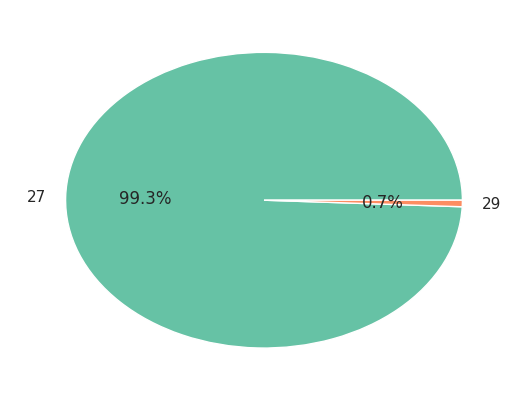

In [13]:
#predictmerge_tsv2.iloc[ft2.shape[1]+1:,:]
#del merge_tsv2
#merged_tsv3.iloc[ft2.shape[1]+1:,:]=zscore(merged_tsv3.iloc[ft2.shape[1]+1:,:],axis=1)
predict_patient_classes=model1.predict(merge_tsv2.iloc[ft2.shape[1]+1:,:].values)
print(predict_patient_classes[:3])
del merge_tsv
del merge_tsv2
print(np.argmax(predict_patient_classes,axis=1))
pre_data=np.argmax(predict_patient_classes,axis=1).astype(np.int32)
del predict_patient_classes 
np.savetxt("TCGA-BRCA.htseq_fpkm.csv",pre_data,delimiter=',')
c = collections.Counter(pre_data)
print(c)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('default')
sns.set()
sns.set_style('whitegrid')
sns.set_palette('Set2')

c_d=dict(c)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.pie(c_d.values(), labels=c_d.keys(), autopct="%1.1f%%")

plt.show()

In [ ]:
del tsv

## 以下参考
* 平均化確認のためのヒストグラム
* メモリ確認

(array([4.0493e+04, 2.8520e+03, 3.6960e+03, 2.2470e+03, 1.3650e+03,
        8.7500e+02, 5.3800e+02, 6.4300e+02, 1.8500e+02, 6.0000e+00]),
 array([0.        , 0.89427693, 1.78855385, 2.68283078, 3.57710771,
        4.47138464, 5.36566156, 6.25993849, 7.15421542, 8.04849234,
        8.94276927]),
 <a list of 10 Patch objects>)

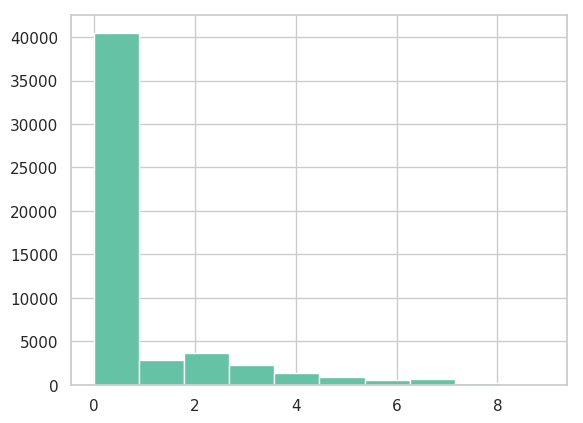

In [25]:
plt.hist(np.ravel(tsv.iloc[:100,1:].values))

(array([4.0771e+04, 3.2950e+03, 3.6180e+03, 2.4480e+03, 8.0000e+02,
        9.6600e+02, 5.7800e+02, 3.9400e+02, 2.8000e+01, 2.0000e+00]),
 array([  0.        ,  21.0990017 ,  42.19800341,  63.29700511,
         84.39600682, 105.49500852, 126.59401023, 147.69301193,
        168.79201364, 189.89101534, 210.99001705]),
 <a list of 10 Patch objects>)

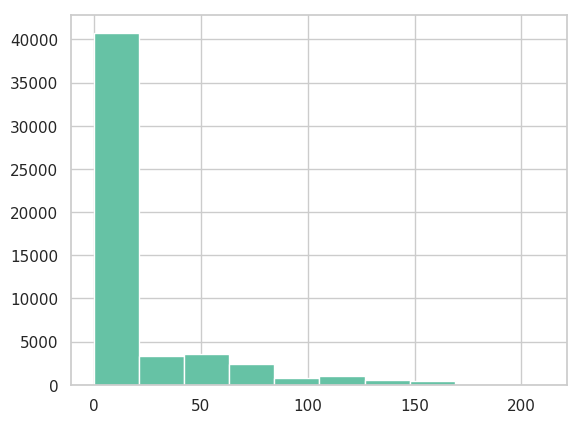

In [27]:
plt.hist(np.ravel(tsv.iloc[:100,1:].values))

(array([4.0289e+04, 2.8640e+03, 3.7270e+03, 2.3030e+03, 1.4610e+03,
        8.4800e+02, 5.6300e+02, 6.4400e+02, 1.9600e+02, 5.0000e+00]),
 array([-0.59264485,  0.04633357,  0.68531199,  1.32429041,  1.96326883,
         2.60224725,  3.24122567,  3.88020408,  4.5191825 ,  5.15816092,
         5.79713934]),
 <a list of 10 Patch objects>)

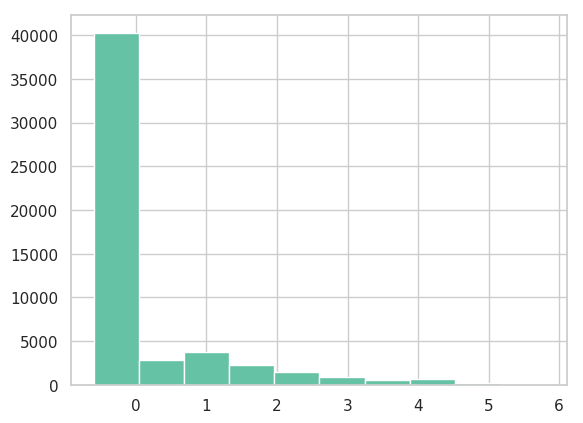

In [29]:
plt.hist(np.ravel(tsv.iloc[:100,1:].values))

In [50]:
%matplotlib inline

In [20]:
import sys
print("{}{:>25}{:>10}{}".format('|','valuable name','|','memory','|'))
print("-------")
for var in dir():
    if not var.startswith("_") and sys.getsizeof(eval(var))>10000:
        print("{}{:>25}{:>10}{}".format('|',var,'|',sys.getsizeof(eval(var)),'|'))

|            valuable name         |memory
-------
|                   X_test         |1243509808
|                      df4         |2805232
|                      ft2         |5262837465
|                   ft4_23         |4974038896
|                   pred_y         |350752
|                      tsv         |260318936
|                   y_test         |701392


In [21]:
del ft4_23